In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("Mall_Customers.csv")

# Preview first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# Drop unnecessary 'CustomerID'
df.drop(columns='CustomerID', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


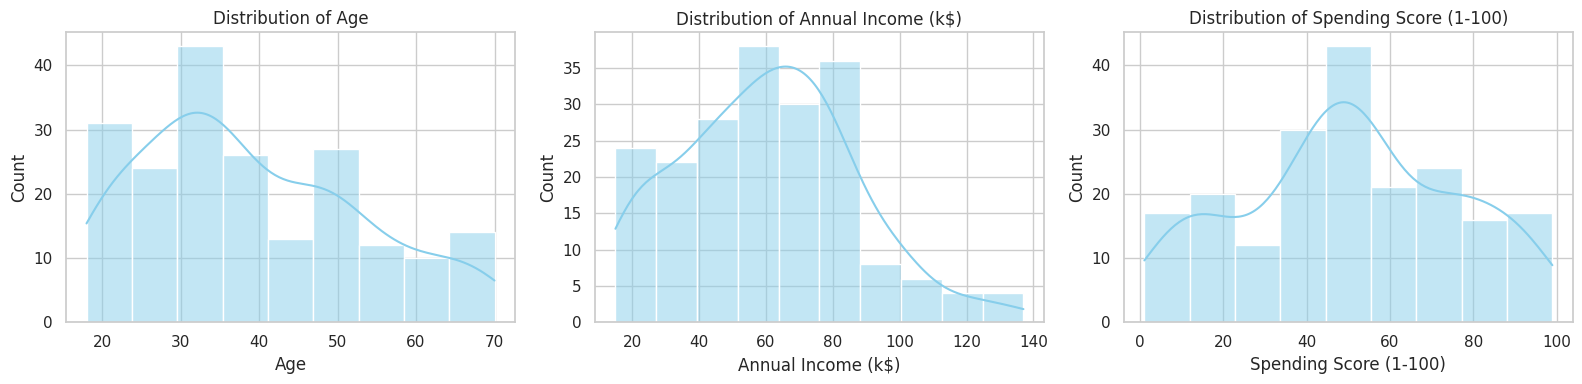

In [8]:
df.describe()
plt.figure(figsize=(16,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

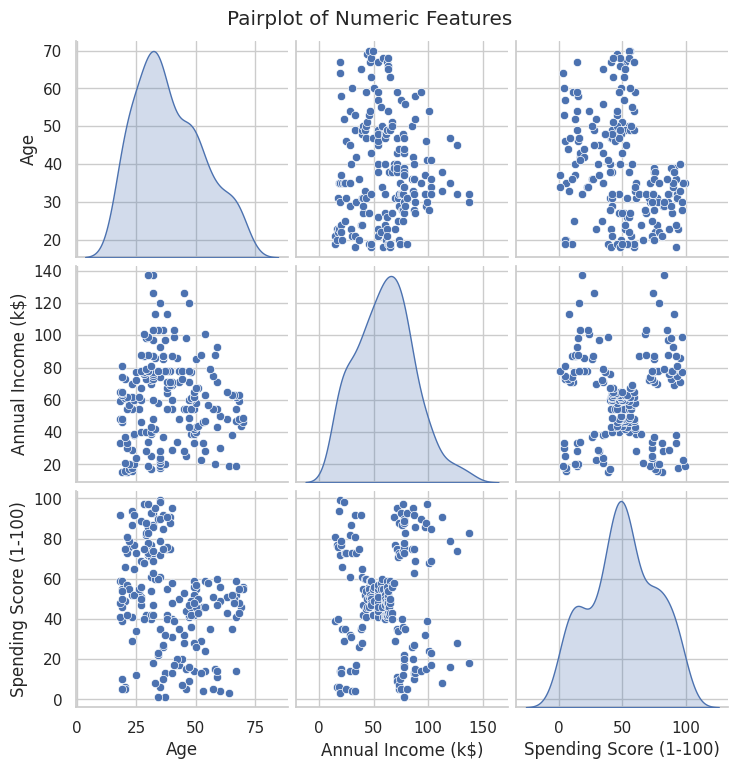

In [9]:
sns.pairplot(df.drop(columns='Gender'), diag_kind='kde', palette='pastel')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

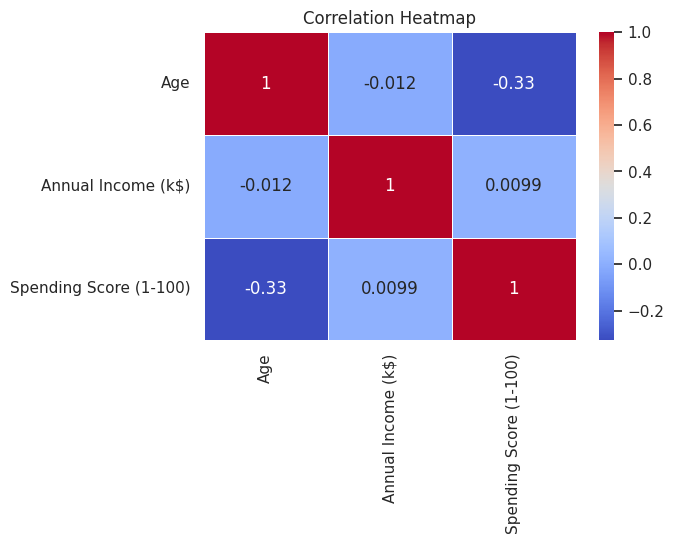

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns='Gender').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

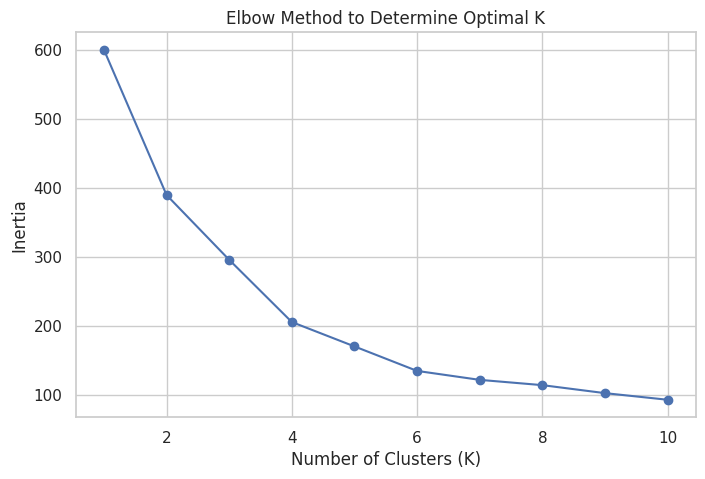

In [12]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()

In [13]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original data
df['Cluster'] = clusters

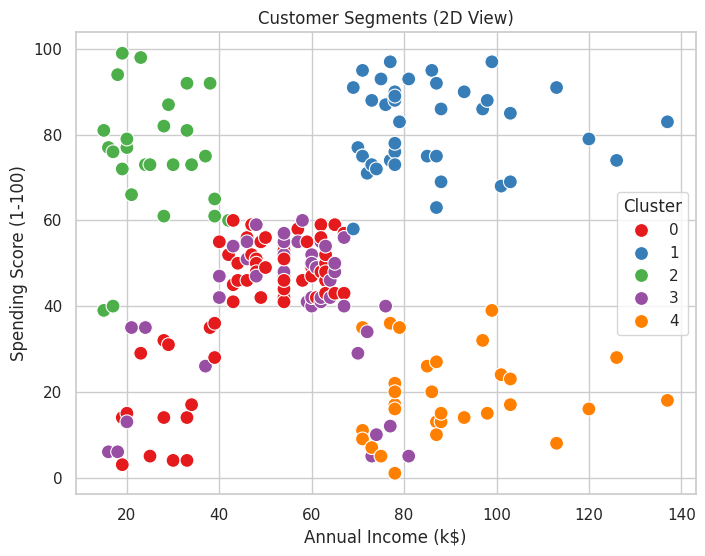

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1', s=100
)
plt.title('Customer Segments (2D View)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [19]:
fig = px.scatter_3d(
    df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
    color='Cluster', symbol='Gender',
    title='Customer Segments in 3D',
    color_continuous_scale='Rainbow'
)
fig.show()

In [18]:
# Only select numeric columns for aggregation
numeric_cols = df.select_dtypes(include=np.number).columns

# Group by cluster and calculate mean
df.groupby('Cluster')[numeric_cols].mean().round(1)


,Age,Annual Income (k$),Spending Score (1-100),Cluster
Cluster,,,,
0,55.3,47.6,41.7,0.0
1,32.9,86.1,81.5,1.0
2,25.8,26.1,74.8,2.0
3,26.7,54.3,40.9,3.0
4,44.4,89.8,18.5,4.0
